# 2- Travailler avec des données Netcd4-python: Suite


Au lieu d'extraire un point de grille, on peut être amener à vouloir extraire un domaine délimité par des latitudes longitudes. 

Dans cet exemple on va travailler avec les moyennes annuelles des données de températures maximales journalières issues issues de plusieurs modèles régionaux de CORDEX-NAM44. 

On va extraire tous les points de grille de la région située entre <b>47degN et 51degN de latitude et entre -72degW et -64degW de longitude</b>.

Nous allons ensuite tracer la variablité inter-annuelle des anomalies de la température annuelle moyenne. 

<img src="./figures/CORDEX_domaine.png" alt="NARR" width="50%" height="60%">


In [10]:
import netCDF4
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import warnings; warnings.filterwarnings(action='once')
import seaborn as sns
from matplotlib import gridspec

rep='./data/Inter_annual_anomaly/'
variable_in = 'Mean_tasmax'

# voici les périodes sur lesquelles nous allons travailler
list_period = ['2011-2040','2041-2070','2071-2100']

#La liste des modèles rcp4.5
list_rcp45 = ['CRCM5-v1_NAM-44_ll_CCCma-CanESM2_rcp45', 'CRCM5-v1_NAM-44_ll_MPI-M-MPI-ESM-LR_rcp45' ]

#Domaine à extraire
latbounds = [ 47 , 51 ]
lonbounds = [ -72 , -64 ] 

In [2]:
# nous allons boucler sur chaque modèle et extraire la région 
df_rcp45 = []
matrix_45 = []
for period in list_period: 
    globals()['flattened_list_'+period] = []
    for i in range(0,len(list_rcp45)):
        filename= rep +'anomalie_' +  list_rcp45[i] +  '_' + variable_in + '_' + period  + '_1971-2000.nc'   
        nc = netCDF4.Dataset(filename)
        var = nc.variables[variable_in][:]  
        lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]
        
        subset = ((lats > latbounds[0]) & (lats < latbounds[1]) & 
             (lons > lonbounds[0]) & (lons < lonbounds[1]))
        data=pd.DataFrame(var[:,subset], dtype='float') 
        globals()['flattened_list_'+period].append(data.mean(axis=1))
        
    df_rcp45.append(pd.DataFrame(globals()['flattened_list_'+period]).T) 
    
df_rcp45 = pd.concat(df_rcp45)
df_rcp45

,0,1
0,1.720843,-0.288691
1,1.476198,0.885357
2,0.581686,0.541863
3,0.390671,-0.014199
4,1.148421,1.294169
5,1.541132,0.546788
6,1.032923,0.995836
7,1.018507,0.173938
8,1.559839,1.138972
9,1.521339,1.493575


Ces modèles couvrent la période 2011-2040, nous pouvons donc écrire le DateTime de notre DataFrame.

In [3]:
TIME=[]
for y in range(int(list_period[0].split('-')[0]),int(list_period[-1].split('-')[-1])+1,1):
    TIME.append(datetime.strptime(str(y), '%Y'))
    
df_rcp45['Date'] = TIME   
df_rcp45.index = df_rcp45['Date']
df_rcp45 = df_rcp45.drop(["Date"], axis=1) 
df_rcp45.head()

,0,1
Date,,
2011-01-01,1.720843,-0.288691
2012-01-01,1.476198,0.885357
2013-01-01,0.581686,0.541863
2014-01-01,0.390671,-0.014199
2015-01-01,1.148421,1.294169


On souhaite ensuite  pour chaque année, la variabilité intra-modèle. Pour cela, nous allons calculer les minimums et maximums en appliquant la méthode <b>.apply</b> . 

In [4]:
df_rcp45['min'] = df_rcp45.apply(np.min, axis=1)
df_rcp45['max'] = df_rcp45.apply(np.max, axis=1)
df_rcp45['mean'] = df_rcp45.apply(np.mean, axis=1)
df_rcp45.head()

,0,1,min,max,mean
Date,,,,,
2011-01-01,1.720843,-0.288691,-0.288691,1.720843,0.716076
2012-01-01,1.476198,0.885357,0.885357,1.476198,1.180777
2013-01-01,0.581686,0.541863,0.541863,0.581686,0.561774
2014-01-01,0.390671,-0.014199,-0.014199,0.390671,0.188236
2015-01-01,1.148421,1.294169,1.148421,1.294169,1.221295


Nous allons faire de même avec l'ensemble des modèles pilotés par les scénarios futurs rcp8.5 et les scénarios historiques. 

In [5]:
list_rcp85 = ['CRCM5-v1_NAM-44_ll_CCCma-CanESM2_rcp85','CRCM5-v1_NAM-44_ll_MPI-M-MPI-ESM-MR_rcp85']
df_rcp85 = []
matrix_85 = []
for period in list_period: 
    globals()['flattened_list_'+period] = []
    for i in range(0,len(list_rcp85)):
        filename= rep + 'anomalie_' +  list_rcp85[i] +  '_' + variable_in + '_' + period  + '_1971-2000.nc'   
        nc = netCDF4.Dataset(filename)
        var = nc.variables[variable_in][:]  
        lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]            
        subset = ((lats > latbounds[0]) & (lats < latbounds[1]) & 
             (lons > lonbounds[0]) & (lons < lonbounds[1]))
        #mask = np.where(subset)
        data=pd.DataFrame(var[:,subset], dtype='float') 
        globals()['flattened_list_'+period].append(data.mean(axis=1))        
    df_rcp85.append(pd.DataFrame(globals()['flattened_list_'+period]).T) 
    
df_rcp85 = pd.concat(df_rcp85)
df_rcp85['Date'] = TIME   
df_rcp85.index = df_rcp85['Date']
df_rcp85 = df_rcp85.drop(["Date"], axis=1)  

df_rcp85['min'] = df_rcp85.apply(np.min, axis=1)
df_rcp85['max'] = df_rcp85.apply(np.max, axis=1)
df_rcp85['mean'] = df_rcp85.apply(np.mean, axis=1)

### Pour les modèles historiques
list_histo = ['CRCM5-v1_NAM-44_ll_CCCma-CanESM2_historical', 'CRCM5-v1_NAM-44_ll_MPI-M-MPI-ESM-LR_historical']
df_histo = []
globals()['flattened_list_'+period] = []
for i in range(0,len(list_histo)):
    filename= rep + 'anomalie_' +  list_histo[i] +  '_' + variable_in + '_1971-2000_1971-2000.nc'   
    nc = netCDF4.Dataset(filename)
    var = nc.variables[variable_in][:]  
    lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]
    
    subset = ((lats > latbounds[0]) & (lats < latbounds[1]) & 
         (lons > lonbounds[0]) & (lons < lonbounds[1]))
    #mask = np.where(subset)
    data=pd.DataFrame(var[:,subset], dtype='float') 
    globals()['flattened_list_'+period].append(data.mean(axis=1))        
df_histo.append(pd.DataFrame(globals()['flattened_list_'+period]).T) 
TIME=[]
for y in range(1971,2001,1):
    TIME.append(datetime.strptime(str(y), '%Y'))  
    
df_histo = pd.concat(df_histo)
df_histo['Date'] = TIME   
df_histo.index = df_histo['Date']
df_histo = df_histo.drop(["Date"], axis=1)  

df_histo['min'] = df_histo.apply(np.min, axis=1)
df_histo['max'] = df_histo.apply(np.max, axis=1)
df_histo['mean'] = df_histo.apply(np.mean, axis=1)

On va combiner tous ces calculs dans une matrice commune. 

In [6]:
result = []
result = pd.DataFrame({'min_rcp45': df_rcp45['min'], 'max_rcp45': df_rcp45['max'],'mean_rcp45': df_rcp45['mean'],
                       'min_rcp85': df_rcp85['min'], 'max_rcp85': df_rcp85['max'],'mean_rcp85': df_rcp85['mean'],
                       'min_histo': df_histo['min'], 'max_histo': df_histo['max'],'mean_histo': df_histo['mean']},
        columns = ['min_rcp45','max_rcp45','mean_rcp45','min_rcp85','max_rcp85','mean_rcp85','min_histo','max_histo','mean_histo']) 

result.tail()

,min_rcp45,max_rcp45,mean_rcp45,min_rcp85,max_rcp85,mean_rcp85,min_histo,max_histo,mean_histo
Date,,,,,,,,,
2096-01-01,1.890078,4.496284,3.193181,5.441835,8.036326,6.739081,NaN,NaN,NaN
2097-01-01,3.863885,5.062620,4.463252,6.105060,7.355627,6.730344,NaN,NaN,NaN
2098-01-01,2.289962,4.603645,3.446804,6.583062,7.147783,6.865423,NaN,NaN,NaN
2099-01-01,2.949836,4.268922,3.609379,6.405183,7.043156,6.724169,NaN,NaN,NaN
2100-01-01,2.998667,3.276854,3.137760,6.167938,6.966082,6.567010,NaN,NaN,NaN


On peut tracer maintenant notre variabilité. 

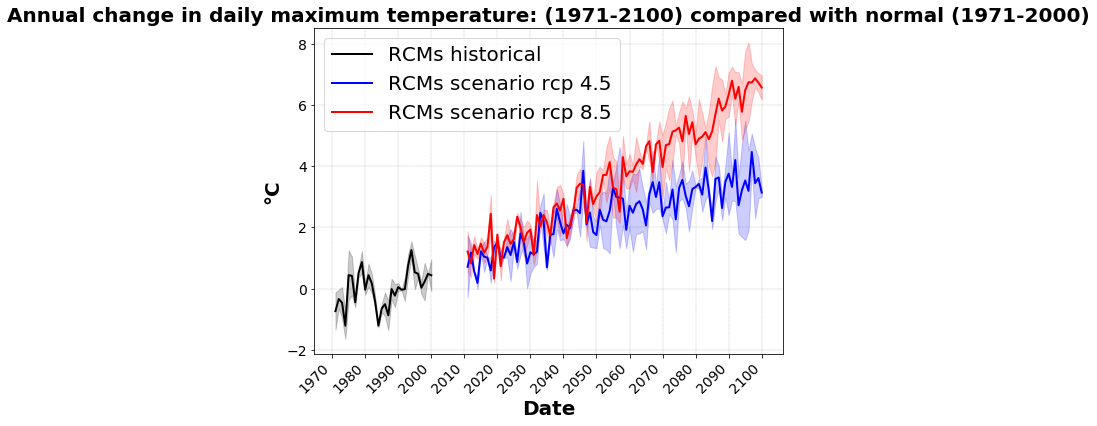

In [7]:
color = ['black','blue', 'red']
fig = plt.figure(figsize=(10, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1]) 
gs.update( wspace=0.04)
ax1 = plt.subplot(gs[0])

plt.rcParams["figure.figsize"]=[16,9]       #  
plt.plot(result.index.year, result['mean_histo'][:],  label='RCMs historical', linewidth=2, c=color[0])
plt.plot(result.index.year, result['mean_rcp45'][:],  label='RCMs scenario rcp 4.5', linewidth=2, c=color[1])
plt.plot(result.index.year, result['mean_rcp85'][:],  label='RCMs scenario rcp 8.5', linewidth=2, c=color[2])

plt.fill_between(result.index.year,result['min_histo'],result['max_histo'], color = color[0], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp45'],result['max_rcp45'], color =  color[1], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp85'],result['max_rcp85'], color =  color[2], alpha=.2)
plt.legend(loc="upper left", markerscale=1., scatterpoints=1, fontsize=20)

plt.xticks(range(result.index.year[0]-1, result.index.year[-1]+1, 10), fontsize=14)
plt.yticks( fontsize=14)

ax1.grid(axis = "x", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)
ax1.grid(axis = "y", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Date', fontsize=20, color='black', weight='semibold')
plt.ylabel('°C', fontsize=20, color='black', weight='semibold')
plt.title('Annual change in daily maximum temperature: (1971-2100) compared with normal (1971-2000)', fontsize=20, color='black', weight='semibold')
 
ax1.set_facecolor('white')
plt.yticks( fontsize=14)
plt.show()  


On voudrait ajouter à coté de notre graphique un boxplot sur l'ensemble des modèles pour les période 1971-2000 et 2071-2100 uniquement. 
On va extraire ces périodes de notre matrice result=[]

In [8]:
list_to_remove = ['min','max','mean']
df_histo = df_histo.drop(list_to_remove, axis=1)  
df_rcp45 = df_rcp45.drop(list_to_remove, axis=1)  
df_rcp85 = df_rcp85.drop(list_to_remove, axis=1) 
df_histo = df_histo.loc['1971' : '2010'].stack()
df_rcp45 = df_rcp45.loc['2071' : '2100'].stack()
df_rcp85 = df_rcp85.loc['2071' : '2100'].stack()

matrix_box = pd.DataFrame({'RCMs_histo': df_histo, 'RCMs_rcp45': df_rcp45,'RCMs_rcp85': df_rcp85},
        columns = ['RCMs_histo','RCMs_rcp45','RCMs_rcp85'])
matrix_box.head()

RCMs_histo  RCMs_rcp45  RCMs_rcp85
Date                                            
1971-01-01 0   -1.341567         NaN         NaN
           1   -0.124120         NaN         NaN
1972-01-01 0   -0.641267         NaN         NaN
           1   -0.035067         NaN         NaN
1973-01-01 0    0.054164         NaN         NaN

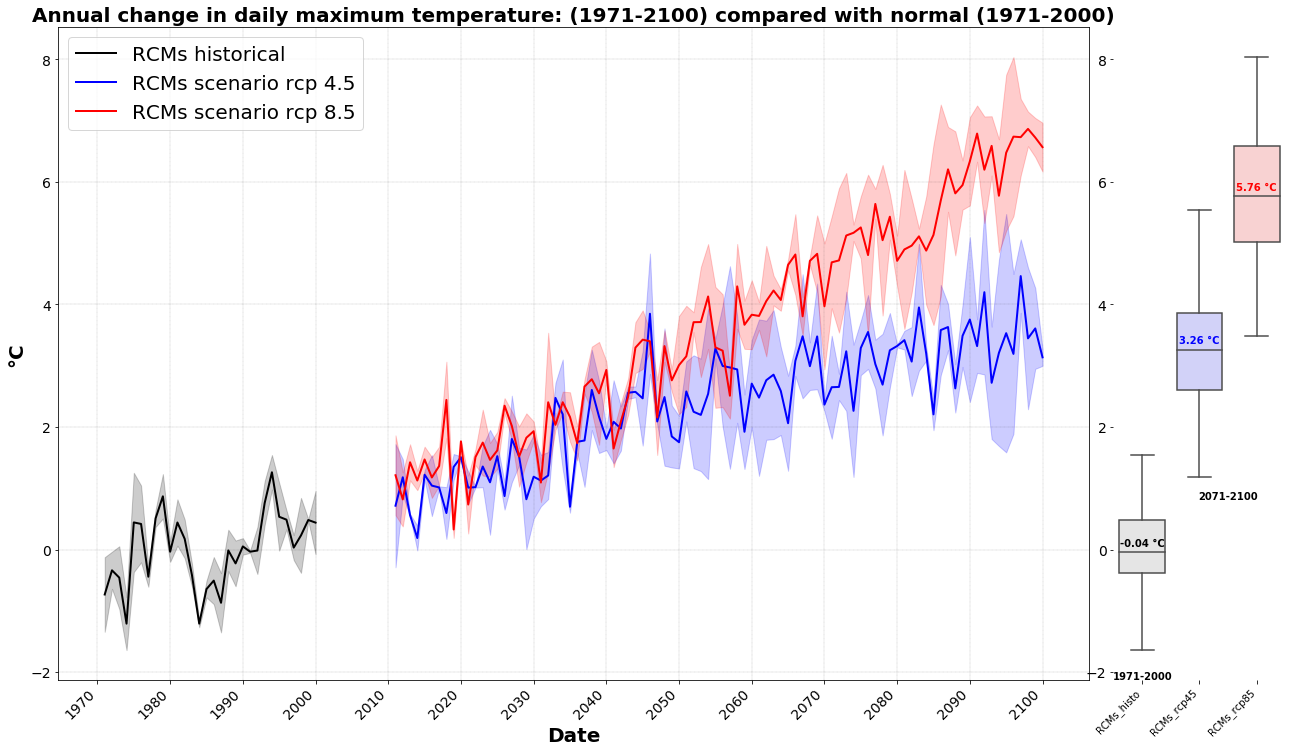

In [9]:
color = ['black','blue', 'red']
fig = plt.figure(figsize=(22, 12)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1]) 
gs.update( wspace=0.04)
ax1 = plt.subplot(gs[0])

plt.rcParams["figure.figsize"]=[16,9]       #  
plt.plot(result.index.year, result['mean_histo'][:],  label='RCMs historical', linewidth=2, c=color[0])
plt.plot(result.index.year, result['mean_rcp45'][:],  label='RCMs scenario rcp 4.5', linewidth=2, c=color[1])
plt.plot(result.index.year, result['mean_rcp85'][:],  label='RCMs scenario rcp 8.5', linewidth=2, c=color[2])

plt.fill_between(result.index.year,result['min_histo'],result['max_histo'], color = color[0], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp45'],result['max_rcp45'], color =  color[1], alpha=.2)
plt.fill_between(result.index.year,result['min_rcp85'],result['max_rcp85'], color =  color[2], alpha=.2)
plt.legend(loc="upper left", markerscale=1., scatterpoints=1, fontsize=20)

#ax.set_xlim(result.index.year[0], result.index.year[-1])
plt.xticks(range(result.index.year[0]-1, result.index.year[-1]+1, 10), fontsize=14)
plt.yticks( fontsize=14)

ax1.grid(axis = "x", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)
ax1.grid(axis = "y", linestyle = "--", color='black', linewidth=0.25, alpha=0.5)

plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")

plt.xlabel('Date', fontsize=20, color='black', weight='semibold')
plt.ylabel('°C', fontsize=20, color='black', weight='semibold')
plt.title('Annual change in daily maximum temperature: (1971-2100) compared with normal (1971-2000)', fontsize=20, color='black', weight='semibold')


my_pal = {"RCMs_histo": "grey", "RCMs_rcp45": "blue", "RCMs_rcp85":"red"}
ax2 = plt.subplot(gs[1])
#ax2 = matrix_box.boxplot(column=['RCMs_histo', 'RCMs_rcp45', 'RCMs_rcp85'])
ax2 = sns.boxplot(data=matrix_box, palette=my_pal)  
# Add transparency to colors
for patch in ax2.artists:
 r, g, b, a = patch.get_facecolor()
 patch.set_facecolor((r, g, b, .2))
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right")
 
ax1.set_facecolor('white')
ax2.set_facecolor('white')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

medians = matrix_box.median().values
median_labels = [str(np.round(s, 2))+' °C' for s in medians]
pos = range(len(medians))
i=0
for tick,label in zip(pos,ax2.get_xticklabels()):
    ax2.text(pos[tick], medians[tick] + 0.1, median_labels[tick], 
            horizontalalignment='center', size='medium', color = color[i], weight='semibold')
    i+=1
x1, x2, x3 = 0, 1, 2
ax2.text(x1, matrix_box.min().min().round()-0.15 , "1971-2000", ha='center', va='bottom', size='medium', color='black', weight='semibold')   
ax2.text((x2+x3)*.5, matrix_box.min().median()-0.4 , "2071-2100", ha='center', va='bottom', size='medium', color='black', weight='semibold')
plt.yticks( fontsize=14)
    
plt.savefig('./figures/VI_YEAR_Mean_tasmax.png', bbox_inches='tight', format='png', dpi=1000)
plt.show()  